### Non numeric proof

Given the fact that : $$\text{EVaR}_{\alpha}[X] \leq \text{CVaR}_{\alpha}[X] \quad \forall \alpha \in [0,1]$$ 

We will proof the following with contradiction. Assume Ni's decomposition is correct we get
$$\text{EVaR}_{\alpha}{[X]} \mathbin{\color{red}=} \inf_{Z \in \mathfrak{U}_{\text{EVaR}}(\alpha)} \big\{ \mathbb{E}[Z \cdot \text{EVaR}_{1-(1-\alpha)Z}[X|H]  \big\},$$
where
$$\mathfrak{U}_{\text{EVaR}}(\alpha) = \{~ \xi ~:~ \mathbb{E}[\xi \log(\xi)] \leq -\log(1-\alpha) ~,~ \mathbb{E}[\xi] = 1~,~ 0\leq \xi \leq \frac{1}{1-\alpha} \},$$
where the last inequality $0\leq \xi \leq \frac{1}{1-\alpha}$ is included with the fact that the conditional risk level has to be within the range 0 and 1 ( eg : $1-(1-\alpha) Z \in [0,1]$ ).

Given the envelop set defined by Ni above $\mathfrak{U}_{\text{EVaR}}(\alpha) \subseteq \mathfrak{U}_{\text{CVaR}}(\alpha) =  \{~ \zeta ~:~ \mathbb{E}[\zeta] = 1~,~ 0\leq \zeta \leq \frac{1}{1-\alpha} \}$ satisfy for all $\alpha$. Let all conditional distributions $X|H$ be degenerate distributions, then for all $\alpha \in [0,1]$, $\text{CVaR}_\alpha[X|H] = \text{EVaR}_\alpha[X|H]$. Ni's decomposition implied that 
$$ \inf_{Z \in \mathfrak{U}_{\text{EVaR}}(\alpha)} \big\{ \mathbb{E}[Z \cdot  \text{EVaR}_{1-(1-\alpha)Z}[X|H]  \big\} \geq \inf_{\tilde{Z} \in \mathfrak{U}_{\text{CVaR}}(\alpha)} \big\{ \mathbb{E}[\tilde{Z} \cdot \text{CVaR}_{1-(1-\alpha)\tilde{Z}}[X|H]  \big\}$$
$$ \text{EVaR}_{\alpha}{[X]} \geq \text{CVaR}_{\alpha}{[X]}$$
which contradict with the fact that $\text{EVaR}_{\alpha}[X] \leq \text{CVaR}_{\alpha}[X] \quad \forall \alpha \in [0,1]$. We conclude the prove that Ni's EVaR decomposition is not always true  with contradiction, therefore
$$\text{EVaR}_{\alpha}{[X]} \neq \inf_{Z \in \mathfrak{U}_{\text{EVaR}}(\alpha)} \big\{ \mathbb{E}[Z \cdot \text{EVaR}_{1-(1-\alpha)Z}[X|H]  \big\}.$$

# Disprove Ni's EVaR decomposition

We will use an example to disprove [Equation(6) of "EVaR Optimization for Risk-Sensitive
Reinforcement Learning" by Ni](https://faculty.engineering.ucdavis.edu/lai/wp-content/uploads/sites/38/2022/02/paper_v13.pdf) which utilized [Pflug Definition 16 Extended Conditional Risk funcitonal](https://www-jstor-org.unh.idm.oclc.org/stable/24736258) and showed that Ni's EVaR decomposition is not accurate. More specifically we showed the below:

\begin{equation}
    \text{EVaR}_{\alpha}{(X)} = \inf_{Z} \big\{ \mathbb{E}[Z \cdot \text{EVaR}_{\alpha ;Z}{(X|H)}]  \big\} \mathbin{\color{red} \neq} \inf_{Z} \big\{ \mathbb{E}[Z \cdot \text{EVaR}_{1-(1-\alpha)Z}{(X|H)}]  \big\},
\end{equation}

which contradict with Equation(6) of Ni's Decomposition.

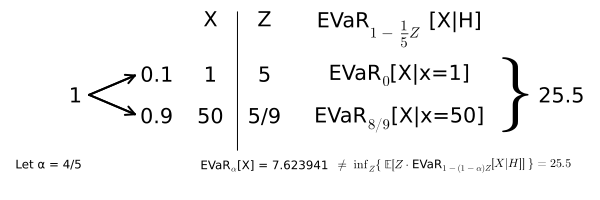

In [1]:
using Plots
using LaTeXStrings
pdraw = plot(
    bg = :white,xlim = (0, 2), ylim = (-0.6, 0.6), linewidth = 2,
    framestyle = :none,legend = false,size = (600, 200)
)
# Predefined Alpha 
annotate!(pdraw,[ (0,-0.5,("Let α = 4/5",8,:black)) ] )
# First column
annotate!(pdraw,[ (0.1,0,("1",:black)) ] )
# Second column
plot!(pdraw,[0.15,0.32],[0,0.14],arrow=true,color=:black,linewidth=2,label="")
plot!(pdraw,[0.15,0.32],[0,-0.14],arrow=true,color=:black,linewidth=2,label="")
annotate!(pdraw,[ (0.4,0.15,("0.1",:black)) ] )
annotate!(pdraw,[ (0.4,-0.15,("0.9",:black)) ] )
# Third column
annotate!(pdraw,[ (0.6,0.55,("X",:black)) ] )
annotate!(pdraw,[ (0.6,0.15,("1",:black)) ] )
annotate!(pdraw,[ (0.6,-0.15,("50",:black)) ] )
# Forth column
plot!(pdraw,[0.7,0.7],[-0.4,0.6],color =:black)
annotate!(pdraw,[ (0.8,0.55,("Z",:black)) ] )
annotate!(pdraw,[ (0.8,0.15,("5",:black)) ] )
annotate!(pdraw,[ (0.8,-0.15,("5/9",:black)) ] )
# Fifth column
annotate!(pdraw,[ (1.3,0.44,(L"EVaR$_{1-\frac{1}{5} Z} $ [X|H]",:black)) ] )
annotate!(pdraw,[ (1.3,0.1,(L"EVaR$_0$[X|x=1]",:black)) ] )
annotate!(pdraw,[ (1.3,-0.22,(L"EVaR$_{8/9}$[X|x=50]",:black)) ] )
# Last column
annotate!(pdraw,[ (1.75,0.0,(L"$\}$",50,:black)) ] )
annotate!(pdraw,[ (1.9,0.0,("25.5",:black)) ] )
# Conclusion
annotate!(pdraw,[ (0.8,-0.54,(L"EVaR$_{\alpha}$[X] = 7.623941",8,:black)) ] )
annotate!(pdraw,[ (1.5,-0.51,(L"$\neq~ \inf_{Z}\{~\mathbb{E}[Z \cdot $"*"EVaR"*L"$_{1-(1-\alpha)Z}[X|H]]~\} = 25.5$",8,:black)) ] )

In [ ]:
savefig("EVaRCounterExample.pdf")